# Introduction to Statistics (37151) 
# Computer Lab 2: Exploring Sampling Distributions and the Central Limit Theorem 

In [161]:
# Please enter your computer lab group number (1 to 11), the name of your computer lab tutor 
# and the full names and student ID numbers of the members of your team below:

# Computer Lab Group Number:
# Name of Tutor:

# Member 1 (Group Leader):
# Member 2:
# Member 3:
# Member 4:
# Member 5:

**Important notes**: 
1. This computer lab is significantly harder than Computer lab 1. Some tips: Collaborate efficiently, start early (before the assigned computer lab time) and meet up with your group after the computer lab to finalise (if needed).
2. You can add comments in R by using the # symbol. These comments are not run as R code and will not affect your output.
3. Always use the help() function to find out how a function works, but do not forget to comment it out when handing in the worksheet (to avoid unnecessary output).
4. For debugging purposes, it is sometimes useful to clean all variables (by deleting them) and rerun all cells. Deleting variables is done by typing $\mathrm{rm(list = ls())}$ in R (in the top code cell). Alternatively, you can use the restart kernel approach in Jupyter notebook (see the instructions).
5. Make sure to check that the HTML file you hand in contains all answers (without anything being cut off). Recall that errors are deducted 1 mark, so make sure to check your solutions thoroughly before submission.

## 1. Introduction to R (Part 2)
In this part of the worksheet, we will extend your knowledge of the different plots and computations you can do in R. These plots and computations will be useful for the rest of the computer lab. Do refer to computer lab worksheet 1 if you need a recap! For a more comprehensive introduction to R, do take a look at https://cran.r-project.org/doc/manuals/r-release/R-intro.pdf. You may also find it useful to do a search on Google for additional help. 

### 1.1. Simulation from probability distributions
The (normalised) histogram of a dataset is an empirical representation of the assumed theoretical probability distribution. We will now illustrate this concept in R. 

We can carry out simulations from a variety of distributions using built-in functions in R. Below is an example of simulating $10{,}000$ samples from a random variable $X\sim N(\mu, \sigma)$, with $\mu=2$ and $\sigma=1$. The simulated samples are used to plot a histogram, which is then normalised (so that the height of each bin is the fraction of observations belowing to the bin, instead of counts) and compared to the theoretical probability density function of $X$ (in this case $f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}$, which can be computed using the dnorm() function in R). The normalisation of the histogram is necessary to get the theoretical probability density function and the histogram on the same scale. 

 [1] 1.986197 2.294887 2.066664 1.355796 0.459000 1.988379 1.874762 1.762938
 [9] 3.231713 2.893647 2.851569 1.256829 2.729982 1.162879 1.255681 2.283667
[17] 1.992987 1.220048 2.031034 1.759590


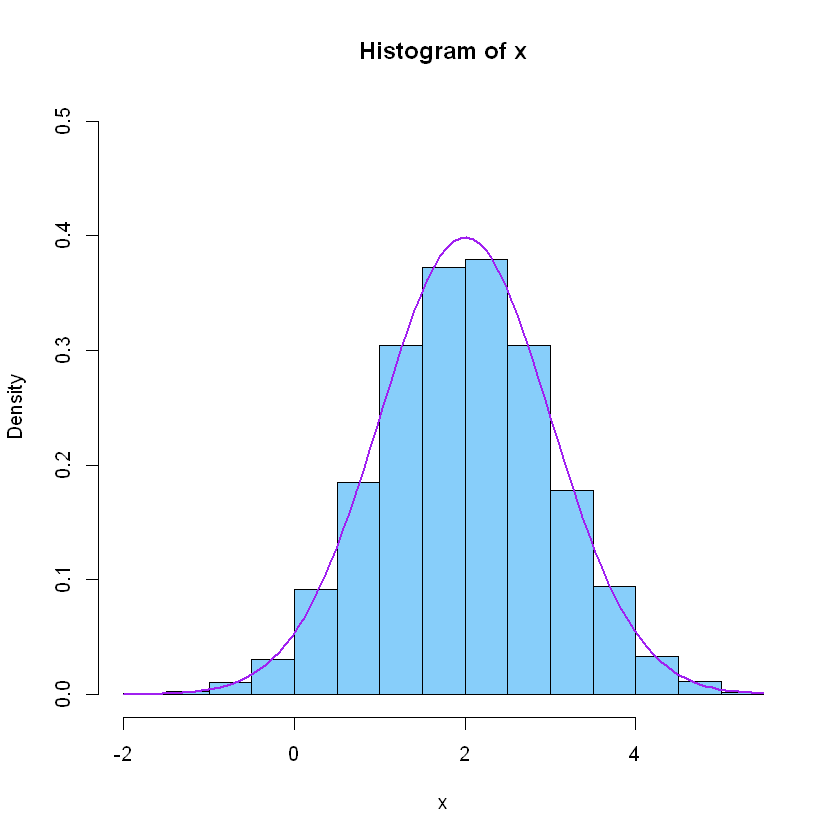

In [162]:
#rm(list=ls()) # Uncomment if you want to clean the work space. If you do, make sure you run all cells again (otherwise you will get errors
# saying variables do not exist)
# Simulate a vector x of length nSamples = 10000 with samples from a normal density with mean mu and variance sigma^2 (standard deviation sigma)
nSamples <- 10000
mu <- 2
sigma <- 1
#help(rnorm) # Uncomment to see the help available for rnorm
x <- rnorm(n = nSamples, mean = 2, sd = 1) # Samples from the normal distribution with parameters mu (mean) and sigma (sd) (see help(rnorm))

# Examine first 20 samples
print(x[1:20])

# Plot a histogram with 20 classes. Probability = TRUE normalises the histogram
h <- hist(x, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0,0.5))

# Plot the probability density function on the same graph. First create a grid of 100 x-values for which the density will be plotted for
x_grid <- seq(min(h$breaks), max(h$breaks), length.out=100) 

# Plot the density (dnorm is for density, whereas rnorm above is for random number generation) on top of the histogram (the function plot() 
# would create a new plot rather than plotting on top,  which is why we use lines() instead)
lines(x = x_grid, y = dnorm(x_grid, mean = mu, sd = sigma), col = "purple", lwd = 2)

$\textbf{Exercise 1.1.1}$: Repeat the exercise above for the random variable $X\sim t(\nu)$ with $\nu=5$ degrees of freedom. This distribution is referred to as a central (non-central parameter is zero) Student t density. Provide the required code in the cell below.

**Hint:** The functions rt() and dt() may be of interest.

 [1] -0.53647056  0.41795438  2.89836123 -0.39867983 -0.32581808 -0.03573589
 [7] -0.28738726  0.73887664  2.19089901  0.50387126 -1.22598387  0.86344317
[13]  0.27343175  0.49218043  0.39209227 -0.24437846  0.15159190 -1.01998839
[19] -0.55909634 -0.13377147


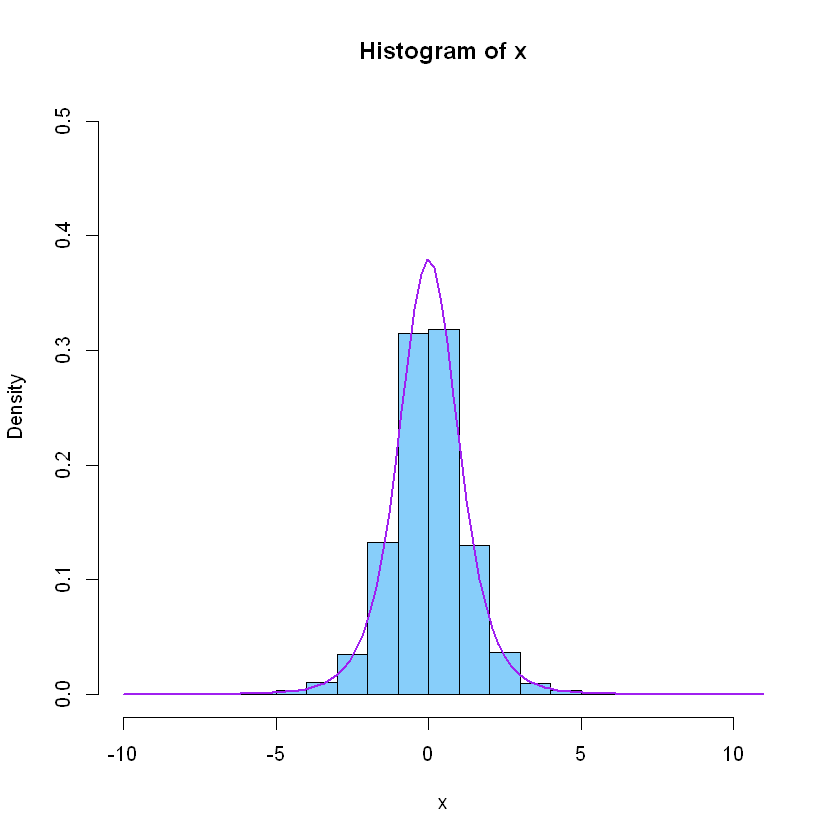

In [163]:
# Simulate a vector x of length nSamples = 10000 with samples from a Student t density with nu = 5 degrees of freedom
nSamples <- 10000
v<-5
x <- rt(nSamples,5)

# Examine first 20 samples
print(x[1:20])

# Plot a histogram with 20 classes. Probability = TRUE normalises the histogram
h <- hist(x, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0,0.5))

# Plot the probability density function on the same graph. First create a grid of 100 x values for which the density will be plotted for
x_grid <- seq(min(h$breaks), max(h$breaks), length.out=100) 
# Plot the density (dt is for density, whereas rt above is for random number generation) on top of the histogram (the function plot() would 
# create a new plot rather than plotting on top, which is why we use lines() instead)
lines(x = x_grid, y = dt(x_grid,5 ), col = "purple", lwd = 2)

$\textbf{Exercise 1.1.2}$: Repeat the exercise above for the random variable $X\sim \mathrm{Exp}(\lambda)$ with $\lambda=E(X)=20$ degrees of freedom. This distribution is referred to as an exponential distribution. Provide the required code in the cell below.

**Hint:** The functions rexp() and dexp() may be of interest. <span style="color:red">**Note that R parameterises the exponential distribution in terms of the rate** </span> $\phi$ instead of the expected value $\lambda$. The relation between the rate $\phi$ and the mean $\lambda$ is given by $\phi=\frac{1}{\lambda}$.

 [1] 0.0188335084 0.0068598542 0.0591101560 0.0007760325 0.1663877338
 [6] 0.0246232854 0.0795921270 0.0245035509 0.0355487032 0.0459015030
[11] 0.0260091537 0.0030033553 0.0945475614 0.0580733245 0.0825616986
[16] 0.0012761442 0.0813708487 0.1164482752 0.0510754544 0.0368147879


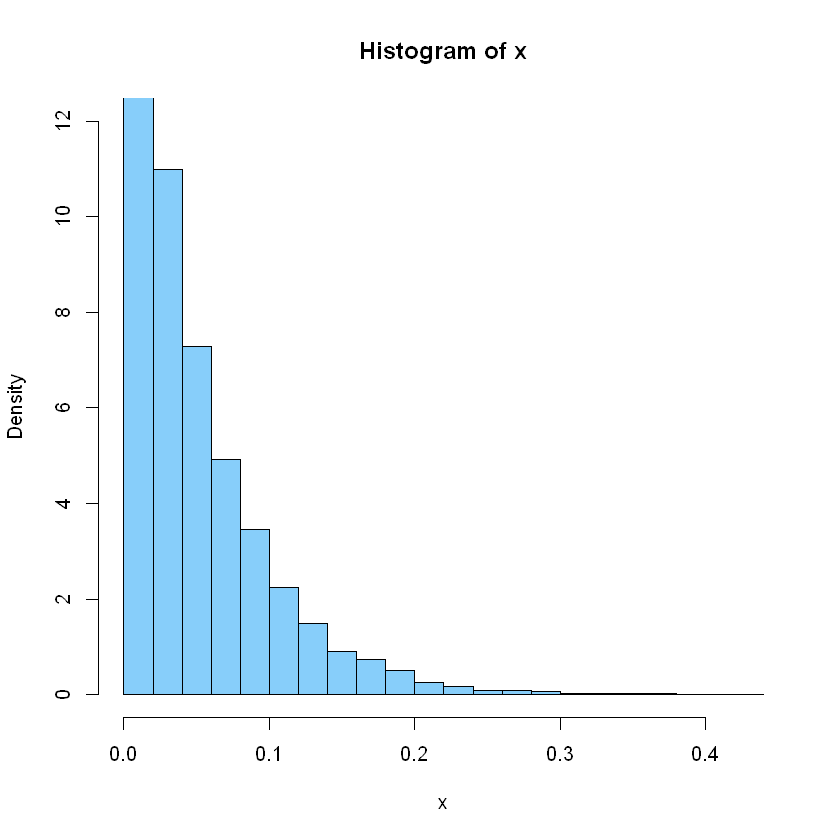

In [164]:
# Simulate a vector x of length nSample = 10000 with samples from an exponential distribution expected value lambda = 20
nSamples <- 10000
r<-20
x <- rexp(nSamples,20)
# Examine first 20 samples
print(x[1:20])
# Plot a histogram with 20 classes. Probability = TRUE normalises the histogram
h <- hist(x, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0,12))
# Plot the probability density function on the same graph. First create a grid of 100 x values for which the density will be plotted for

# Plot the density (dt is for density, n plotting on top, which is why we use lines() instead)whereas rt above is for random number generation) on top of the histogram (the function plot() 
# would create a new plot rather tha

### 1.2. Computing means in R
We can use R to compute the mean of each column of a matrix, or of each row. We will use this when we study sampling distributions by simulation in Sections 2 and 3. Below, we illustrate how to compute these means on a simulated 10 x 3 matrix where each element follows a $N(2, 1)$ distribution. 

In [165]:
# Simulate a matrix xMatrix of size nRows x nColumns with draws from a normal density with mu = 2 and sigma = 1. We do so by first simulating a vector x of length nRows x nColumns 
# and then reshape it to a matrix
x <- rnorm(n = 10*3, mean = 2, sd = 1) # A (dimension-less) vector of length 30 
xMatrix <- matrix(x, nrow = 10, ncol = 3) # Reshaping it to two dimensions, with (10, 3)

# Computing and printing the means of the columns
print(colMeans(xMatrix))

[1] 1.616461 2.226123 1.612882


In [166]:
# Computing and printing the means of the rows
print(rowMeans(xMatrix))

 [1] 2.424717 1.845304 2.328497 1.656555 1.399354 1.868834 1.442496 2.000941
 [9] 1.001989 2.216201


$\textbf{Exercise 1.2.1}$: Compute the means of the columns and rows of the matrix that consist of the first five rows of xMatrix. Provide the required code in the cell below.

In [167]:
# Computing and printing the means of the columns of the matrix that consist of the five first rows of xMatrix
New<-xMatrix[0:5,]
print(colMeans(New))
# Computing and printing the means of the rows of the matrix that consist of the five first rows of xMatrix
print(rowMeans(New))

[1] 1.467365 2.340011 1.985280
[1] 2.424717 1.845304 2.328497 1.656555 1.399354


### 1.3. For-loops in R
We can also use a for-loop to compute the mean of each column of a matrix, or of each row. The advantage is that we can perform more complicated operations for each row or column (not just computing means as colMeans() and rowMeans() do), which we will need later. Below, we illustrate how to compute the row means on the simulated 10 x 3 matrix above (xMatrix). Recall from Computer lab 1 that square brackets are used to access elements in a vector or matrix.

In [168]:
row_means <- rep(0, dim(xMatrix)[1]) # Initialise a vector with values zeros to store the result
# dim(xMatrix) returns the dimension of the matrix (number of rows, number of columns)
# Compute the row means using a for-loop
for(i in 1:dim(xMatrix)[1]){ # For i = 1, 2, ..., dim(xMatrix)[1]. 
    row_means[i] <- mean(xMatrix[i,]) # Compute the mean of row i and store it in position i.
}

# Compare to rowMeans (should be the same)
print(row_means)
print(rowMeans(xMatrix))

 [1] 2.424717 1.845304 2.328497 1.656555 1.399354 1.868834 1.442496 2.000941
 [9] 1.001989 2.216201
 [1] 2.424717 1.845304 2.328497 1.656555 1.399354 1.868834 1.442496 2.000941
 [9] 1.001989 2.216201


In [169]:
# Alternatively, to make a comparison, check if all Boolean values are true:
row_means == rowMeans(xMatrix)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

$\textbf{Exercise 1.3.1}$: Compute the means of the *columns* of xMatrix using a for-loop. Compare to the result obtained using colMeans. Provide the required code in the cell below.

In [170]:
# Provide the required code in this cell
col_means <- rep(0, dim(xMatrix)[2])
for(i in 1:dim(xMatrix)[2]){
   col_means[i] <- mean(xMatrix[,i])
    }
print(col_means)
print(colMeans(xMatrix))
#The results are the same

[1] 1.616461 2.226123 1.612882
[1] 1.616461 2.226123 1.612882


## 2. Exploring sampling distributions via simulation
As discussed in Week 7, the classical paradigm in statistics treats the *population parameter* $\theta$ as a fixed (non-random) constant  and the data $X$ as random. The key object for inference in the classical paradigm is the *sampling distribution*, which is the probability distribution of the statistic, also known as the *estimator*, $\widehat{\Theta}$ of the population parameter $\theta$. Assuming a dataset of sample size $n$, the estimator $\widehat{\Theta}$ is a function of the data $X_1, \dots, X_n$, and hence the randomness of the sampling distribution is *inherited from the randomness of the data*. Understanding sampling distributions is key for understanding the classical paradigm in statistics, and in this computer lab we will use simulation to achieve this.

Assuming we know the statistical model, we can simulate many replicates of the dataset (each of sample size $n$) and study the sampling distribution in a simulation setting. Of course, in reality we can derive the sampling distribution analytically for many models$^1$ and we can therefore carry out inference using a single replicate of the dataset. This is fortunate, as otherwise we would need to repeat an experiment many times to arrive at a statistical conclusion! Nevertheless, studying the sampling distribution in a simulation setting as we will do in this computer lab deepens our understanding of what a sampling distribution is.

The concept of illustrating a sampling distribution by simulation is illustrated in Section 2.1 below for the case study estimating the population mean $\mu$ in a normal population with *known variance* $\sigma^2$. To exemplify, imagine we are estimating the population mean of the intelligence quotient (IQ) score in the Australian population based on a sample of $n=10$ individuals. We assume that $$X=\{\text{Test score in an IQ test of an Australian}\}$$ 
follows a normal distribution with known $\sigma = 15$, i.e. $X\sim N(\mu, 15)$. In our simulation setting, we *will pretend that we do not know the true value* $\mu=100$ and study the properties of the sampling distribution of the *estimator* of $\mu$, $\overline{X}=\frac{1}{n}\sum_{i=1}^{n} X_i$, by simulating $10{,}000$ replicates of the dataset. You may think of this as repeating the experiment $10{,}000$ times, where we each time sample $n=10$ new individuals.

<sub>$^1$: The interested reader may want to know what can be done for models without an analytical sampling distribution. There is a technique referred to as *bootstrapping*, which samples from a given dataset with replacement to obtain many replicates (avoiding the need of repeating the experiment) and then studies the sampling distribution by simulation. This is outside the scope of this subject. </sub>

### 2.1 Sampling distribution of the estimator of the population mean in a normal population with known variance
Suppose that we sample $n=10$ individuals and let $X_1,X_2, \dots, X_{10}$ be a random sample with $X_i \sim N(\mu, \sigma=15)$ being the IQ score of individual $i$. Recall that in this exercise, we are pretending we *do not know the true value* of the population parameter $\theta=\mu$ ($\mu=100$), but we have access to $10{,}000$ repeated experiments (each of size $n=10$ individuals) and will use the repeated experiments to study the sampling distribution of the estimator $\widehat{\Theta}=\overline{X}$. The following code simulates $10{,}000$ replicates (each of size $n=10$) from $N(\mu=100, \sigma=15)$, estimates the population mean $\mu$ for each of the replicates, and plots a normalised histogram. *This normalised histogram is an empirical representation of the assumed theoretical sampling distribution*.

[1] 10000    10
[1] 10000


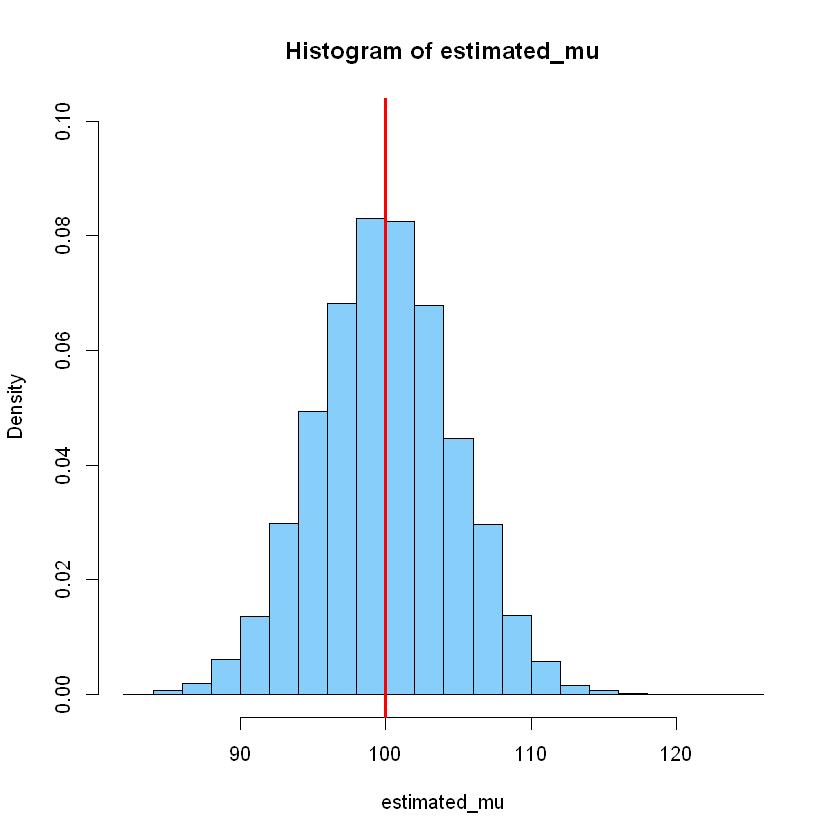

In [171]:
# Simulate a matrix xReplicates of size nReplicates x n with draws from a normal density with mu = 100 and sigma = 15
nReplicates <- 10000
n <- 10
true_mu <- 100
sigma <- 15
x <- rnorm(n = nReplicates*n, mean = true_mu, sd = sigma)
xReplicates <- matrix(x, nrow = nReplicates, ncol = n)
print(dim(xReplicates)) # should be 10000 rows, 10 columns. Each row contains a simulated dataset with sample size n from the theoretical population 

# Compute the mean of each replicate (note that we could also use a for loop)
estimated_mu <- rowMeans(xReplicates) # Each element contains an estimate of the true population mean mu (based on the corresponding sample)
print(length(estimated_mu)) # should be 10000.

# Plot a normalised histogram. We mark the true value as a red vertical line
h <- hist(estimated_mu, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0, 0.10))
abline(v=true_mu, col = 'red', lwd = 3)

We will now plot the theoretical sampling distribution of $\overline{X}$ on top of the histogram. The theory from Week 7 tells us that $\overline{X} \sim N(\mu_{\overline{X}}, \sigma_{\overline{X}})$, i.e. normally distributed. Once we know $\mu_{\overline{X}}=E(\overline{X})$ and $\sigma^2_{\overline{X}}=V(\overline{X})$, we can reuse some code from Section 1.1 to plot the density on top of the normalised histogram.  


$\textbf{Exercise 2.1.1}$: What are the (theoretical) values of $\mu_{\overline{X}} = E(\overline{X})$ and $\sigma^2_{\overline{X}}=V(\overline{X})$. Type your answers in the the cell below as a comment (preceeded with a  #). 

**Hint:** Since $X_1, \dots, X_n$ are independent, it is trivial to derive this result. Alternatively, the answers may be found in the lecture slides.

In [172]:
# mu_Xbar = 100
# sigma2_Xbar = 15

$\textbf{Exercise 2.1.2}$: Plot the theoretical distribution of $\overline{X}$ on top of the normalised histogram. Expand on the (almost complete) code in the cell below.

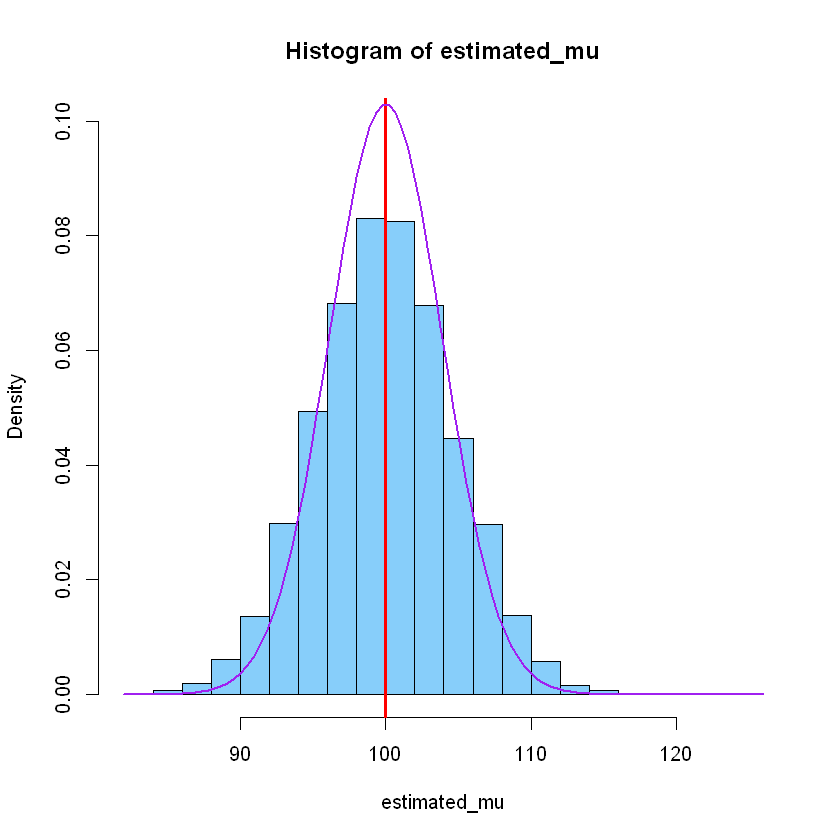

In [173]:
# Plot a normalised histogram. We mark the true value as a red vertical line
h <- hist(estimated_mu, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0, 0.10))
abline(v=true_mu, col = 'red', lwd = 3)

# Plot the density (dnorm is for density, whereas rnorm above is for random number generation) on top of the histogram (the function plot() 
# would create a new plot rather than plotting on top, which is why we use lines() instead)
mu_Xbar <- 100 # Replace '?' with answer from above
sigma2_Xbar <- 15 # Replace '?' with answer from above
x_grid <- seq(min(h$breaks), max(h$breaks), length.out=100) # First create a grid of 100 x-values for which the density will be plotted for
lines(x = x_grid, y = dnorm(x_grid, mean = mu_Xbar, sd = sqrt(sigma2_Xbar)), col = "purple", lwd = 2)

### 2.2 Sampling distribution of the *standardised* estimator of the population mean in a normal population with known variance
Suppose that we have the same scenario as above, i.e. we sample $n=10$ individuals and let $X_1,X_2, \dots, X_{10}$ be a random sample with $X_i \sim N(\mu, \sigma=15)$ being the IQ score of individual $i$. In this subsection, we will study the sampling distribution of the standardised estimator $$Z = \frac{\overline{X}-\mu_{\overline{X}}}{\sigma_{\overline{X}}},$$
still assuming $\sigma_{\overline{X}}$ is known. The so-called $Z$-score above is a common quantity in statistics and will be used frequently in this subject. We now derive and study its sampling distribution empirically.


$\textbf{Exercise 2.2.1}$: What is the theoretical sampling distribution of $Z$ above? Type your answer in the the cell below as a comment (preceeded with a  #). 

**Hint:** What is $\mu_{Z} = E(Z)$ and $\sigma^2_{Z}=V(Z)$? Recall that a linear transformation of a normal random variable is still a normal random variable. 

In [174]:
# Z follows a normal distribution with mean E(Z) and V(Z)
mean(Z_scores)
var(Z_scores)

[1] 0.02038811

[1] 1.468945

$\textbf{Exercise 2.2.2}$: Plot the theoretical distribution of $Z$ on top of the normalised histogram of the $z$ samples. Expand on the (less completed that previously) code in the cell below

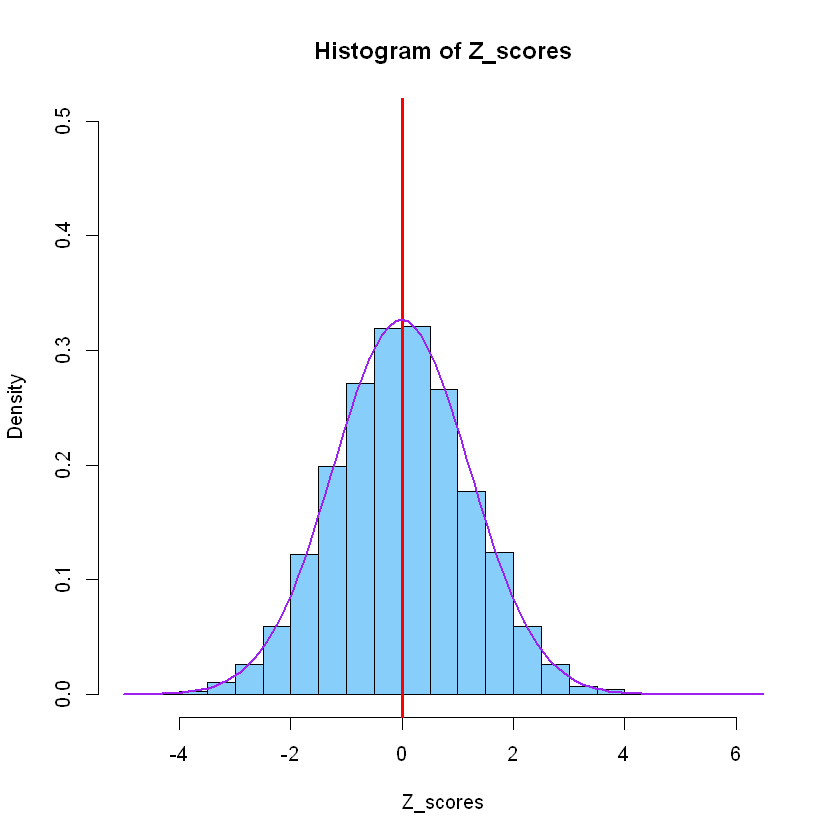

In [175]:
# Plot a normalised histogram of z values (do not forget to standardise!). We mark the true value (do not forget to standardise) as a red 
# vertical line
mu_Xbar <- 100
sigma2_Xbar <- 15
sigma_Xbar <- sqrt(sigma2_Xbar)
Z_scores <- (estimated_mu - mu_Xbar)/sigma_Xbar # Note that we are standardising 

h <- hist(Z_scores, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0, 0.5))
abline(v=(true_mu - mu_Xbar)/sigma_Xbar, col = 'red', lwd = 3) # Standardised true value

# Plot the density on top of the histogram. The code for doing this has been used above, you have to find and adapt the code for this example yourselves. 
# First create a grid of 100 x-values for which the density will be plotted for
x_grid <- seq(min(h$breaks), max(h$breaks), length.out=100) 

# Now plot the theoretical density on top of the (normalised) histogram for each value in x_grid
lines(x = x_grid, y = dnorm(x_grid, mean = mean(Z_scores), sd = sqrt(var(Z_scores))), col = "purple", lwd = 2)

### 2.3 Sampling distribution of the estimator of the population variance in a normal population
Both Sections 2.1 and 2.2 assume that *the variance $\sigma^2$ is known*. A more realistic scenario is that the *variance of the population is unknown* and must therefore be estimated from the sample. We will study the sampling distribution of the following estimator of $\sigma^2$,
$$S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \overline{X})^2 \quad \text{with} \quad \overline{X}=\frac{1}{n}\sum_{i=1}^{n} X_i,$$
when $X_i \sim N(\mu=100, \sigma=15)$. It is mathematically more convenient (and equivalent) to study the sampling distribution of  a scaled version of the estimator above,
$$\frac{(n-1)S^2}{\sigma^2} = \frac{1}{\sigma^2} \sum_{i=1}^n (X_i - \overline{X})^2.$$
Below we use the repeated simulations stored in *xReplicates* from Section 2.1 to study the sampling distribution of $S^2$.


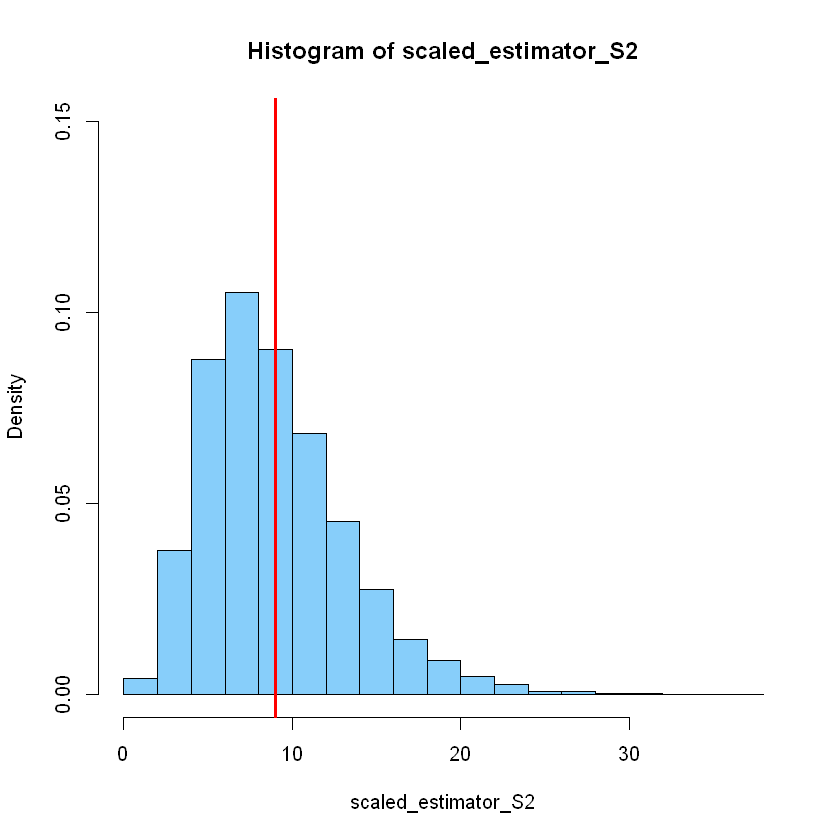

In [176]:
# Use the simulated matrix xReplicates of size nReplicates x n with draws from a normal density with mu = 100 and sigma = 15
nReplicates <- 10000
n <- 10
true_sigma <- 15
true_sigma2 <- true_sigma^2

# Compute the scaled estimator of each replicate stored i xReplicates created in Section 2.1 (note that we must use a for-loop)
S2 <-  rep(0, nReplicates) # Initialise a vector with values zeros to store the result of the sample variances 
scaled_estimator_S2 <-  rep(0, nReplicates) # Initialise a vector with values zeros to store the result of the scaled estimators
for(i in 1:nReplicates){ # For i = 1, 2, ..., nReplicates.
    S2[i] <- 1/(n-1)*sum((xReplicates[i,] - mean(xReplicates[i,]))^2) # Compute the sample variance of row i and store it in position i
    scaled_estimator_S2[i] <- (n-1)*S2[i]/true_sigma2
}

h <- hist(scaled_estimator_S2, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0, 0.15))
abline(v=(n-1)*true_sigma2/true_sigma2, col = 'red', lwd = 3) # Note that the true value of the scaled estimator is n-1


$\textbf{Exercise 2.3.1}$: Plot the theoretical distribution of $(n-1)S^2/\sigma^2$ on top of the normalised histogram above. Expand on the code in the cell below.

**Hint**: This sampling distribution **is not normal**, and it **does not follow** any of the distributions explored so far in this computer lab. Once you know which sampling distribution we are dealing with, it should be straightforward to Google the R function of interest. Carefully read the R documentation (recall the help() function) to see how to compute the density of interest.

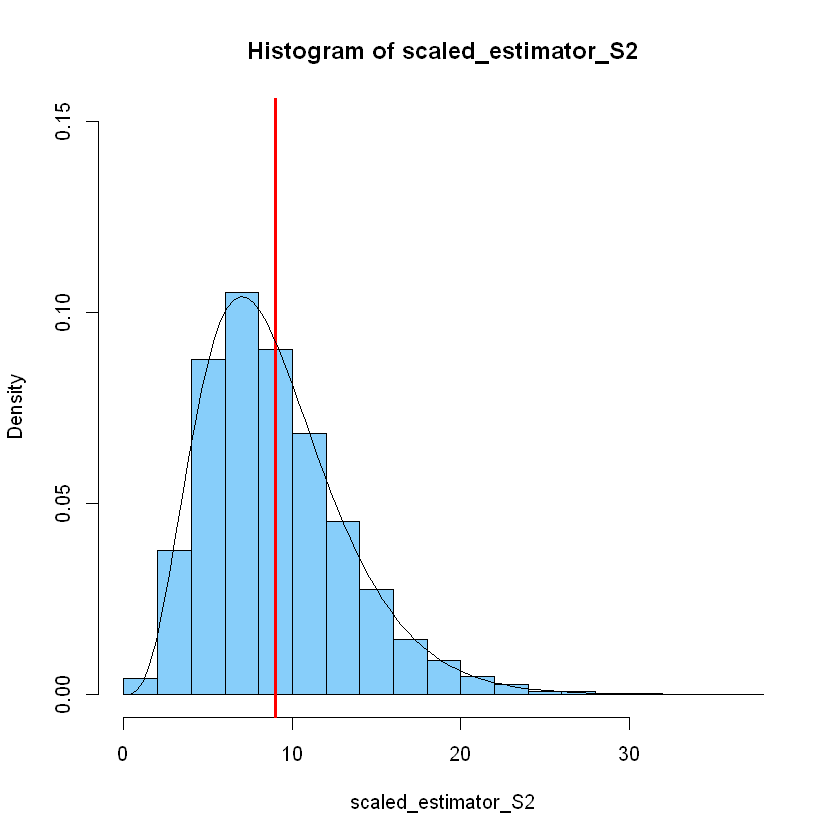

In [177]:
# Histogram and true value
h <- hist(scaled_estimator_S2, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0, 0.15))
abline(v=(n-1)*true_sigma2/true_sigma2, col = 'red', lwd = 3) # Note that the true value of the scaled estimator is n-1

# Now plot the theoretical density on top of the (normalised) histogram. Do not forget to create the grid values first
x_grid <- seq(min(h$breaks), max(h$breaks), length.out=100) 
lines(x = x_grid, y = dchisq(x_grid, 9))

### 2.4 Sampling distribution of the *standardised* estimator of the population mean in a normal population with unknown variance
We now return to the problem of estimating the population mean $\mu$ in a normal population as in Section 2.2, but under the more realistic scenario of an *unknown variance* $\sigma^2$, which is estimated using $S^2$ that we studied in Section 2.3.

Recall the scenario that we sample $n=10$ individuals and let $X_1,X_2, \dots, X_{10}$ be a random sample with $X_i \sim N(\mu, \sigma)$ being the IQ score of individual $i$. In Section 2.2, we studied the sampling distribution of the standardised estimator $$Z = \frac{\overline{X}-\mu_{\overline{X}}}{\sigma_{\overline{X}}}=\frac{\overline{X}-\mu_{\overline{X}}}{\sigma\big/\sqrt{n}},$$
*with $\sigma$ known*. When $\sigma$ is *unknown* (and the population is normal), we instead use the so-called $T$-score,
$$T = \frac{\overline{X}-\mu_{\overline{X}}}{S\big/\sqrt{n}}.$$
Note that the $T$-score resembles the $Z$-score, but divides with $S=\sqrt{S^2}$ where $S^2$ is the estimator of $\sigma^2$ whose sampling distribution is studied in Section 2.3. Unlike the $Z$-score, the $T$-score **does not** follow a normal distribution. We now study the sampling distribution of the $T$-score.

$\textbf{Exercise 2.4.1}$: Plot the histogram of the samples of  $$T =  \frac{\overline{X}-\mu_{\overline{X}}}{S\big/\sqrt{n}}.$$  Provide the required code in the cell below.

**Hint:** There is no need to simulate random numbers from $N(100, 15)$ again. You already have the required quantities in the variables $\mathrm{estimated\_mu}$ (Section 2.1) and $\mathrm{S2}$ (Section 2.3), and R can handle element-wise addition, substraction, multiplication and division of vectors if they are the same length. Moreover, R interprets operations between vectors and scalars by transforming the scalar into a vector with the same elements in each position, and then performing element-wise operations. 

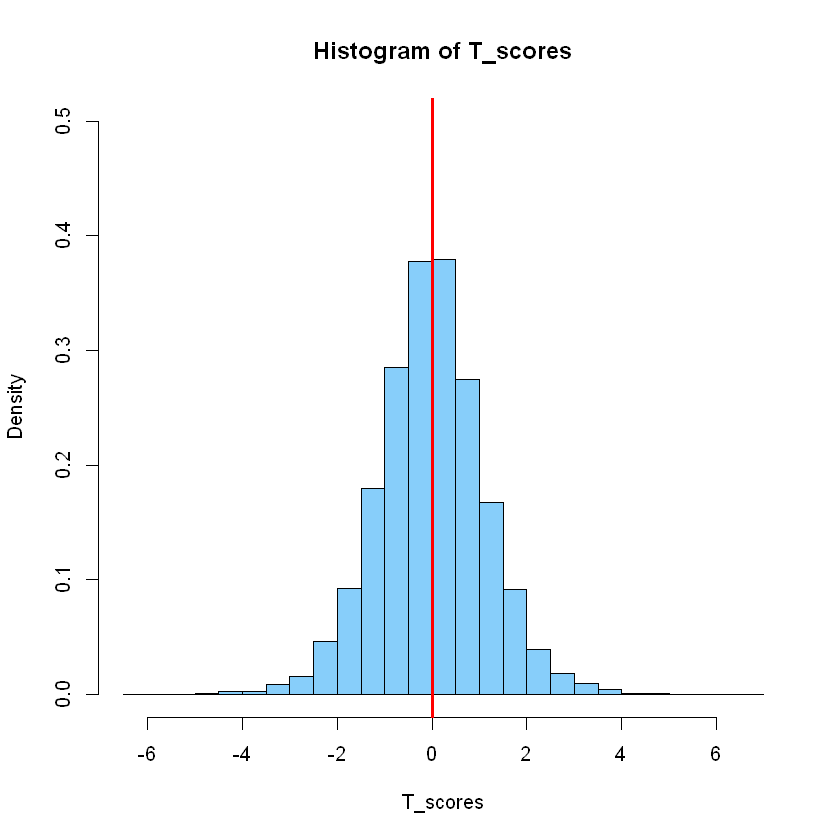

In [178]:
# Compute the T-scores
T_scores =(estimated_mu-mu_Xbar)/(sqrt(S2/n)) # Replace '?' with your code

# Plot a histogram of the 10000 T-scores above
h <- hist(T_scores, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0, 0.5))
abline(v=(true_mu -mu_Xbar)/(sqrt(S2/n)), col = 'red', lwd = 3)

$\textbf{Exercise 2.4.2}$: Plot the theoretical distribution of $$T =  \frac{\overline{X}-\mu_{\overline{X}}}{S\big/\sqrt{n}}$$ on top of the normalised histogram above. Expand on the code in the cell below.

**Hint:** This sampling distribution was covered in Week 7.


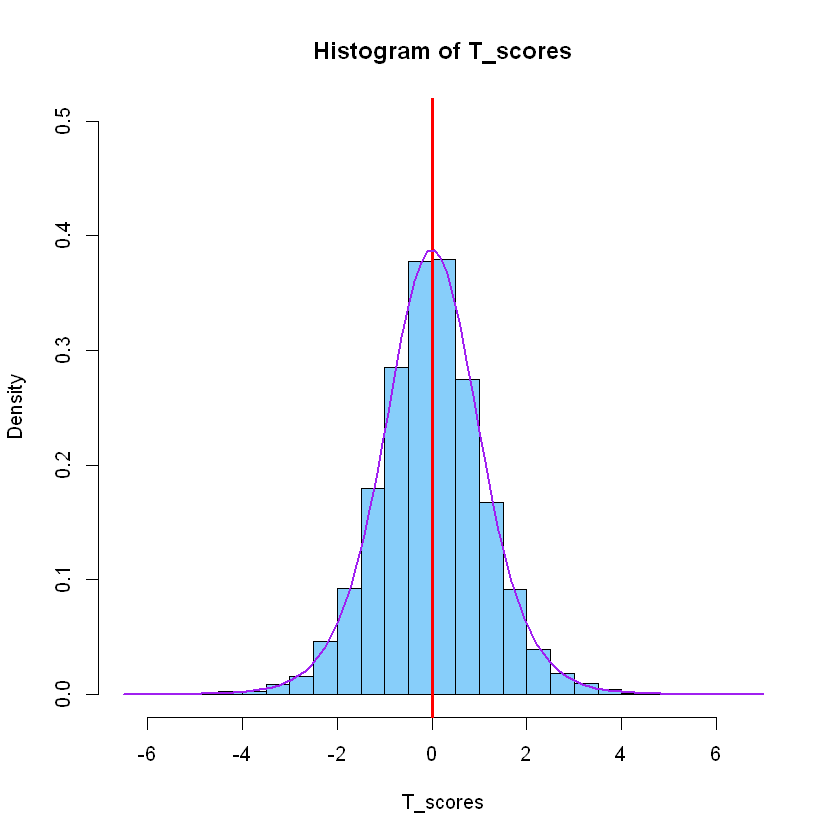

In [179]:
# Plot the histogram first (same as above)
h <- hist(T_scores, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0, 0.5))
abline(v=(true_mu -mu_Xbar)/(sqrt(S2/n)), col = 'red', lwd = 3)
# Now plot the theoretical density on top of the (normalised) histogram. Do not forget to create the grid values first
# First create a grid of 100 x-values for which the density will be plotted for
x_grid <- seq(min(h$breaks), max(h$breaks), length.out=100) 
lines(x = x_grid, y = dt(x_grid,9 ), col = "purple", lwd = 2)

$\textbf{Exercise 2.4.3}$: Plot the standard normal distribution (which is the theoretical sampling distribution of the $Z$-score) on top of the histogram of the $T$-scores, as well as the theoretical sampling distribution of the $T$-scores. Comment on the difference.

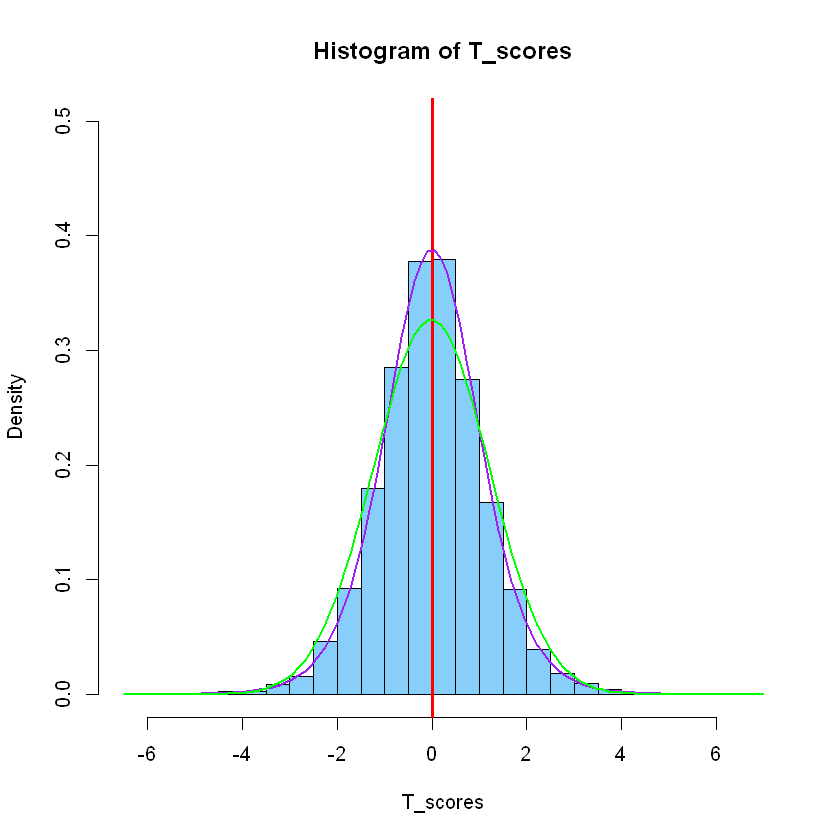

In [180]:
# Plot the histogram first (same as above)
h <- hist(T_scores, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0, 0.5))
abline(v=(true_mu -mu_Xbar)/(sqrt(S2/n)), col = 'red', lwd = 3)
# Plot the theoretical density of the T-score on top of the (normalised) histogram. Do not forget to create the grid values first (same as above)
# First create a grid of 100 x-values for which the density will be plotted for
x_grid <- seq(min(h$breaks), max(h$breaks), length.out=100) 
lines(x = x_grid, y = dt(x_grid,9 ), col = "purple", lwd = 2)
# Plot the theoretical density of the Z-score (use another color than purple)
lines(x = x_grid, y = dnorm(x_grid, mean = mean(Z_scores), sd = sqrt(var(Z_scores))), col = "green", lwd = 2)
# Comment on the difference
# The density for T scores density is highly peaked as compared to the one for z scores

## 3. Exploring the Central Limit Theorem via simulation

In Section 2, we studied sampling distributions under the assumption *that the population is normal*. This normality assumption implies that it is possible to analytically derive the following sampling distributions
$$\overline{X}\sim N\left(\mu,\frac{\sigma}{\sqrt{n}}\right), \quad Z \sim N(0, 1),  \quad \frac{(n-1)S^2}{\sigma^2} \sim \chi^2(n-1) \quad \text{and } T \sim t(n-1). $$ 
If the population is not normal, then the results above do not hold and we will now see how the Central Limit Theorem (CLT) can sometimes provide an approximate solution. 

The CLT is a powerful tool that is useful for computing an approximate sampling distribution of an estimator $\widehat{\Theta}$ when the estimator consists of sums of random variables (which includes all examples in the equation above). Loosely speaking, the CLT says that the sum of $n$ independent identically distributed random variables $X_i$ will be *approximately normal* if $n$ is large, *regardless of the distribution* of $X_i$. Although we have removed the normality assumption of $X_i$, it is important to note that other assumptions are introduced with the version of the CLT that we present in this subject:
1. We assume that the $X_i$ are independent and identically distributed$^2$.
2. We assume that $\sigma^2 < \infty\phantom{.}^3$.
3. We assume that $n$ is large.

Assumptions 1. and 2. can be relaxed (see the footnotes), however, Assumption 3 cannot be relaxed. The CLT is therefore only applicable when $n$ is large, and how large it needs to be  depends on the application as we will see below.

<sub>$^2$: The interested reader may want to know that the independence assumption can be relaxed; see for example the Lindeberg-Feller CLT. The same applies for the identically distributed assumption; see for example the Lyapunov CLT. This is outside the scope of this subject. </sub>

<sub>$^3$: The interested reader may want to know this assumption can be relaxed; see for example the Generalised CLT. This is outside the scope of this subject. </sub>

### 3.1 The Central Limit Theorem for a symmetrically distributed population
In this subsection, we illustrate how the CLT behaves when the distribution of the population is symmetric. We assume that $X\sim \mathrm{Unif}(0,1)$ and want to see how the sampling distribution of $\sum_{i=1}^n X_i$ behaves for different values of $n$. 
The following code illustrates this for $n=1,2,5,10$ using a for-loop. The par() function allows us to do subplots.

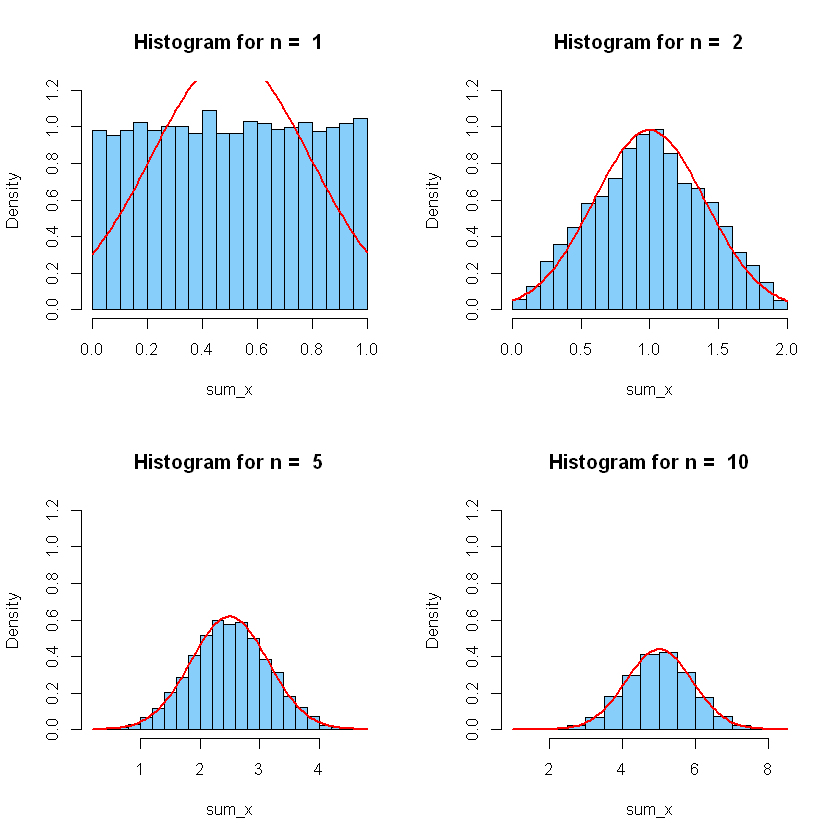

In [159]:
n_values = c(1, 2, 5, 10) # Vector of n values to loop over
nReplicates <- 10000
par(mfrow = c(2, 2)) # A plot with four subplots (2 rows, 2 columns)
for(n in n_values){ # For n in n_values (defined above)
    # Simulate a matrix xReplicates of size nReplicates x n with draws from a uniform density on the interval [0, 1]
    x <- runif(n = nReplicates*n, min = 0, max = 1) 
    xReplicates <- matrix(x, nrow = nReplicates, ncol = n)
    
    # Compute the sum of each replicate
    sum_x <- rowSums(xReplicates) # Each element contains a sum of the n samples
    
    # Plot a normalised histogram. main controls the title of the subplot. The function paste is used for creating a dynamic title that depends on
    # value of n
    h <- hist(sum_x, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0,1.2), main = paste("Histogram for n = ", n))
    
    # To judge if it is normal, plot a normal density on top with the mean and standard deviation corresponding to those in the simulated samples
    x_grid <- seq(min(h$breaks), max(h$breaks), length.out=100) 
    lines(x = x_grid, y = dnorm(x_grid, mean = mean(sum_x), sd = sd(sum_x)), col = "red", lwd = 2)
    
}

In the subplots above, we clearly see that the normal approximation improves as $n$ increases. For $n=1$ the approximation is very poor. For $n=2$, the histogram has fatter tails than the normal distribution, whereas the approximation is reasonable already for $n=5$.

### 3.2 The Central Limit Theorem for an asymmetrically distributed population
We now assume that $X\sim \mathrm{Exp}(\lambda)$, with $\lambda = E(X) = 0.5$. <span style="color:red">**Recall that R parameterises the exponential distribution in terms of the rate** </span> $\phi$ instead of the expected value $\lambda$. The relation between the rate $\phi$ and the mean $\lambda$ is given by $\phi=\frac{1}{\lambda}$.

$\textbf{Exercise 3.1.1}$: Following Section 3.1, illustrate how the sampling distribution of $\sum_{i=1}^n X_i$, when $X_i\sim \mathrm{Exp}(0.5)$, behaves for $n=1,2,5,10$. Provide the required code in the cell below. Comment on your findings.

**Hint:** You can reuse much of the code in Section 3.1. 

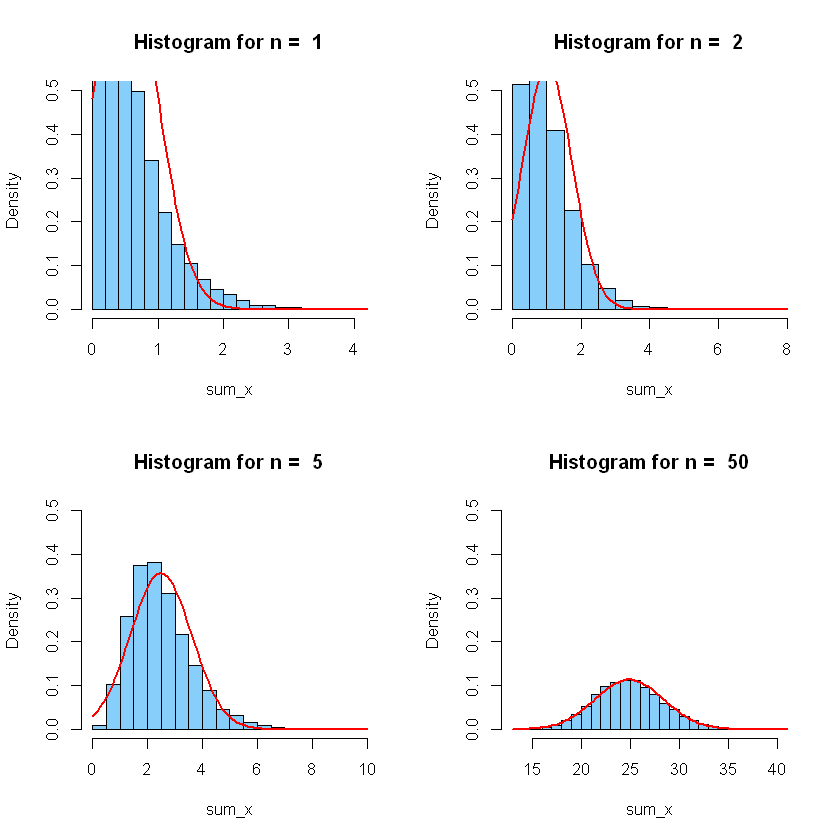

In [118]:
# Provide the required code in this cell
n_values = c(1, 2, 5, 50) # Vector of n values to loop over
nReplicates <- 10000
par(mfrow = c(2, 2)) # A plot with four subplots (2 rows, 2 columns)
for(n in n_values){ # For n in n_values (defined above)
    # Simulate a matrix xReplicates of size nReplicates x n with draws from a uniform density on the interval [0, 1]
    x <- rexp(n = nReplicates*n, rate = 1/0.5) #runif(n = nReplicates*n, min = 0, max = 1) 
    xReplicates <- matrix(x, nrow = nReplicates, ncol = n)
    
    # Compute the sum of each replicate
    sum_x <- rowSums(xReplicates) # Each element contains a sum of the n samples
    
    # Plot a normalised histogram. main controls the title of the subplot. The function paste is used for creating a dynamic title that depends on
    # value of n
    h <- hist(sum_x, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0,0.5), main = paste("Histogram for n = ", n))
    
    # To judge if it is normal, plot a normal density on top with the mean and standard deviation corresponding to those in the simulated samples
    x_grid <- seq(min(h$breaks), max(h$breaks), length.out=100) 
    lines(x = x_grid, y = dnorm(x_grid, mean = mean(sum_x), sd = sd(sum_x)), col = "red", lwd = 2)
    
}

$\textbf{Exercise 3.1.2}$: Find a value of $n$ (may be larger than 10) for which you believe the normal approximation is adequate. Provide your answer in the the cell below.

In [ ]:
# Comment your answer in this cell
#In the subplots above, we clearly see that the normal approximation improves as 𝑛 increases. For 𝑛=1 the approximation is very poor.
#For 𝑛=2, the histogram has fatter tails than the normal distribution, whereas the approximation is reasonable already for 𝑛=5.

$\textbf{Exercise 3.1.3}$: In Section 2.3, we found that the sampling distribution of $S^2$ was skewed to the right when $n=10$. Since $S^2$ is a sum of identically and independently distributed random variables, the CLT should apply for its sampling distribution. i.e. we expect it to be approximately normal if $n$ is large enough. Find the value of $n$ for which the CLT seems to be an accurate approximation according to the simulation. Provide the answer (which $n$ is adequate) and the required code in the cell below.

**Hint:** You can reuse much of the code in Section 2.3. However, note that *xReplicates* used there is based on $n=10$ observations, so you will have to generate a new set of simulations.


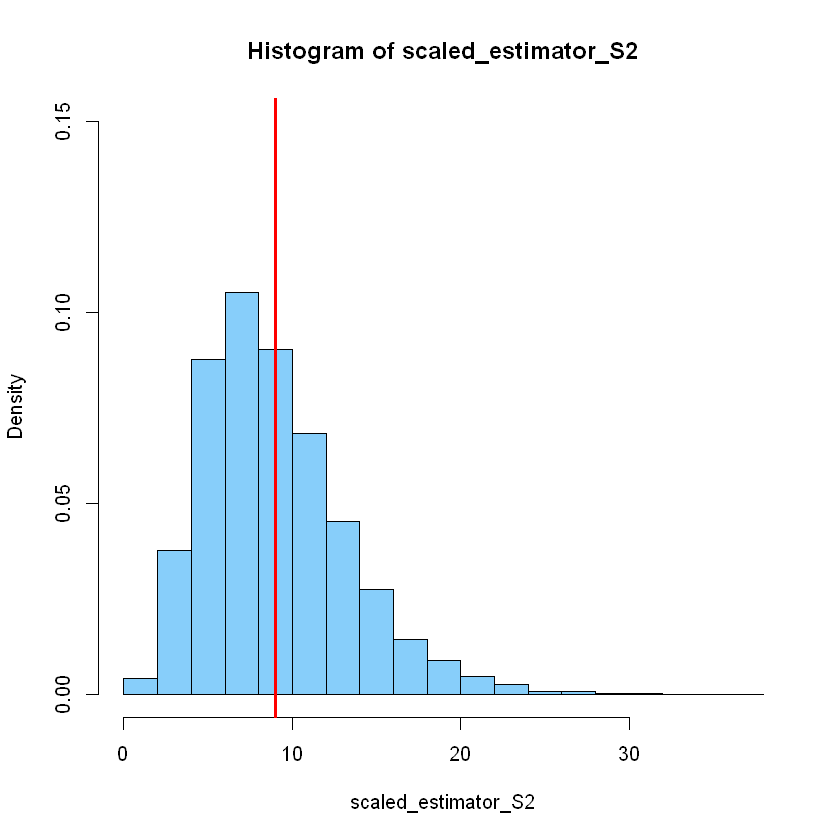

In [181]:
# Provide the required code in this cell
# Use the simulated matrix xReplicates of size nReplicates x n with draws from a normal density with mu = 100 and sigma = 15
nReplicates <- 10000
n <- 10
true_sigma <- 15
true_sigma2 <- true_sigma^2

# Compute the scaled estimator of each replicate stored i xReplicates created in Section 2.1 (note that we must use a for-loop)
S2 <-  rep(0, nReplicates) # Initialise a vector with values zeros to store the result of the sample variances 
scaled_estimator_S2 <-  rep(0, nReplicates) # Initialise a vector with values zeros to store the result of the scaled estimators
for(i in 1:nReplicates){ # For i = 1, 2, ..., nReplicates.
    S2[i] <- 1/(n-1)*sum((xReplicates[i,] - mean(xReplicates[i,]))^2) # Compute the sample variance of row i and store it in position i
    scaled_estimator_S2[i] <- (n-1)*S2[i]/true_sigma2
}

h <- hist(scaled_estimator_S2, breaks = 20, col = "lightskyblue", probability = TRUE, ylim = c(0, 0.15))
abline(v=(n-1)*true_sigma2/true_sigma2, col = 'red', lwd = 3) # Note that the true value of the scaled estimator is n-1


This concludes the worksheet for Computer lab 2. Remember to submit your completed worksheets (in HTML format) via email to your computer lab tutors!